### Importing modules

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier as XGBC
# from imblearn.over_sampling import SMOTE 
import sklearn.utils 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split, StratifiedKFold 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, classification_report 

pd.set_option('display.max_columns', 50)

### Loading Data

In [3]:
battles = pd.read_csv('battles.csv')
char_deaths = pd.read_csv('character-deaths.csv')
char_pred = pd.read_csv('character-predictions.csv')

In [4]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [5]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [6]:
char_deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


## Data Exploration

Since our task is to predict characters death. We will focus on Character dataset

In [7]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [8]:
# viewing age properties
char_pred['age'].describe()

count       433.000000
mean      -1293.563510
std       19564.340993
min     -298001.000000
25%          18.000000
50%          27.000000
75%          50.000000
max         100.000000
Name: age, dtype: float64

There are negative value for date of birth. Negative mean for age.
Let's investigate that.

Research was made and according to [Fandom.com](https://gameofthrones.fandom.com/wiki/Doreah) Doreah is 25 years old.

According to [Fanthom.com](https://gameofthrones.fandom.com/wiki/Rhaego) Rhaego was never born.

### Feature Engineering


In [9]:
char = char_pred.copy()

#### Cleaning Feature

In [10]:
# Replacing the age
char.loc[1684, 'age'] = 25.0
char.loc[1868, 'age'] = 0.0

Removing NaNs

In [11]:
miss = char.isna().sum()
miss[miss > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

We have 14 columns with NaN vales. We will replace that of age with the average age value.

Replace date of birth and date of death with the median value.

Replace other categorical variable with unknown

Replace other numerical variable with -1

In [12]:
# Fill missing age with average age
char["age"].fillna(round(char["age"].mean()), inplace=True)
char['dateOfBirth'].fillna(char['dateOfBirth'].median(), inplace=True)
char['DateoFdeath'].fillna(char['DateoFdeath'].median(), inplace=True)

In [13]:
cat = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
for col in cat:
    char[col].fillna('unknown', inplace=True)
char.fillna(-1, inplace=True)
char['culture'].unique()

array(['unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

Some culture are spelt wrongly thus making duplicate. E.g. 'Westermen', 'Westerman' and 'westermen' are all the same.

In [14]:
# From  Shail Daliwala's kernel on Kaggle
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

# char.loc[:, "culture"] = [get_cult(x) for x in char.culture.fillna("")]


Link to other data

In [15]:
# Names of all Attackers
all_attackers = set(battles.attacker_1).union(set(battles.attacker_2))\
.union(set(battles.attacker_3)).union(set(battles.attacker_4))
# Names of all Defenders
all_defenders = set(battles.defender_1).union(set(battles.defender_2))

# Unique attackers and defenders combined
all_warlead = all_attackers.union(all_defenders)
all_warlead = list(all_warlead)
all_warlead.remove(np.nan)

renam_warlead = []
for x in all_warlead:
    house = 'House ' + x
    renam_warlead.append(house)
    
# All attacking commanders
all = []
for i in battles['attacker_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_att_commanders = set(all)

# All defending commanders
all = []
for i in battles['defender_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_def_commanders = set(all)

# All commanders 
all_commanders = all_att_commanders.union(all_def_commanders)
# characters who swore allegiance in character death data
char_with_allgnc = char_deaths[char_deaths['Allegiances'] != 'None']

# Extracting the above character from all character data
all_char_with_allgnc = char_pred[char_pred['name'].isin(char_with_allgnc['Name'])]

# house of character with allegiance to another house (house in character dead allegiance column)
hus_char_with_allegnc = all_char_with_allgnc['house']

# Extract unique house of allegiance from charater death data.
husOfAllgnc = list(set(char_deaths['Allegiances']))
husOfAllgnc.remove('None')

renam_husOfAllgnc = []
for x in husOfAllgnc:
    house = 'House ' + x
    renam_husOfAllgnc.append(house)


Creating Feature

In [16]:
char['isACommander'] = np.where(char['name'].isin(all_commanders), 1, 0)
char['inHouseOfWarLead'] = np.where(char['house'].isin(renam_warlead), 1, 0)
char['houseSworeAllegiance'] = np.where(char['house'].isin(hus_char_with_allegnc), 1, 0)
char['inHouseOfAllegnc'] = np.where(char['house'].isin(renam_husOfAllgnc), 1, 0)
char = char.drop(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'dateOfBirth',
                  'DateoFdeath', 'house'], axis=1)


Feature Selection

In [17]:
new = char.copy()

In [18]:
# Heatmap of numerical feature in the training dataset
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()['isAlive'].abs().sort_values()
corr_mat

book3                   0.006693
inHouseOfWarLead        0.029822
isAliveSpouse           0.031536
book5                   0.032846
isNoble                 0.042211
isMarried               0.050037
houseSworeAllegiance    0.052159
isACommander            0.057968
book2                   0.067200
inHouseOfAllegnc        0.113380
isAliveHeir             0.116365
isAliveFather           0.123615
age                     0.136891
isAliveMother           0.140661
male                    0.146982
book1                   0.147401
isPopular               0.153860
popularity              0.183223
numDeadRelations        0.192444
boolDeadRelations       0.193736
book4                   0.268975
isAlive                 1.000000
Name: isAlive, dtype: float64

<AxesSubplot:>

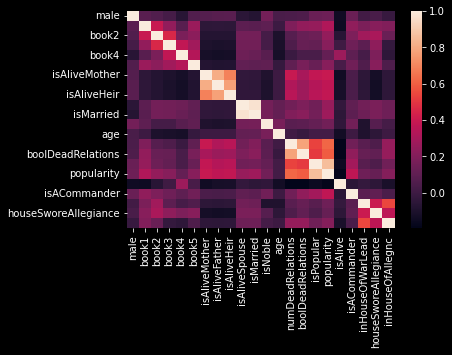

In [19]:
# Heatmap of numerical feature in the training dataset
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()
sb.heatmap(data=corr_mat)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = num_features.drop(columns='isAlive')
vif = pd.DataFrame()
vif['features'] = x.columns

vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by='VIF', ascending=False)

,features,VIF
7,isAliveFather,165.111250
6,isAliveMother,93.203589
8,isAliveHeir,77.020836
9,isAliveSpouse,28.026185
10,isMarried,15.455632
12,age,10.098704
16,popularity,7.642320
15,isPopular,4.347781
19,houseSworeAllegiance,3.579165
4,book4,3.242501


There are multicolinearity in the features. Let's drop some columns with multicolinearity

In [21]:
# Dropping columns with colinearity
new = new.drop(['isAliveFather', 'isAliveMother', 'isAliveSpouse'], axis=1)

In [22]:
# Selecting features with coefficient greater than 0.1
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()['isAlive'].abs().sort_values()
corr_less = corr_mat[corr_mat < 0.1]
corr_less

book3                   0.006693
inHouseOfWarLead        0.029822
book5                   0.032846
isNoble                 0.042211
isMarried               0.050037
houseSworeAllegiance    0.052159
isACommander            0.057968
book2                   0.067200
Name: isAlive, dtype: float64

In [23]:
new = new.drop(corr_less.index, axis=1)

In [24]:
# List of categorical variable
nominal_features = ['title', 'culture', 'mother', 'father', 'heir', 'spouse']

# Counting unique values in each column
unique_count = new[nominal_features].apply(lambda x: len(x.value_counts())).sort_values()

In [25]:
# Arbitrary cutoff of 25 unique count
unique_count = unique_count[unique_count > 25].index
# Dropping 
new = new.drop(unique_count, axis=1)

In [26]:
# Converting the remaining text column to categorical type
txt_col = new.select_dtypes(include=['object'])
for col in txt_col:
    new[col] = new[col].astype('category')
    
# Creating dummy columns from txt columns and add back to dataframe
new = pd.concat([
    new, pd.get_dummies(new.select_dtypes(include=['category']))
], axis=1).drop(txt_col, axis=1)

In [27]:

character = char_pred.copy()
def transform_data(data):
    # Replacing the age
    data.loc[1684, 'age'] = 25.0
    data.loc[1868, 'age'] = 0.0
    
    # Replacing missing values
    data["age"].fillna(round(data["age"].mean()), inplace=True)
    data['dateOfBirth'].fillna(data['dateOfBirth'].median(), inplace=True)
    data['DateoFdeath'].fillna(data['DateoFdeath'].median(), inplace=True)
    
    data.loc[:, "culture"] = [get_cult(x) for x in data.culture.fillna("")]
    cat = ['title', 'mother', 'father', 'heir', 'house', 'spouse']
    for col in cat:
        data[col].fillna('unknown', inplace=True)
    data.fillna(-1, inplace=True)
    
    data['isACommander'] = np.where(data['name'].isin(all_commanders), 1, 0)
    data['inHouseOfWarLead'] = np.where(data['house'].isin(renam_warlead), 1, 0)
    data['houseSworeAllegiance'] = np.where(data['house'].isin(hus_char_with_allegnc), 1, 0)
    data['inHouseOfAllegnc'] = np.where(data['house'].isin(renam_husOfAllgnc), 1, 0)
    
    data = data.drop(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title',
                      'dateOfBirth', 'DateoFdeath', 'house'], axis=1)
    
    return data

def select_features(data):
    # Heatmap of numerical feature in the training dataset
    num_features = data.select_dtypes(['int', 'float'])
    corr_mat = num_features.corr()['isAlive'].abs().sort_values()
    corr_less = corr_mat[corr_mat < 0.1]
    data = data.drop(corr_less.index, axis=1)
    
    # Dropping columns with colinearity
    data = data.drop(['isAliveFather', 'isAliveMother'], axis=1)
    
    # List of categorical variable
    nominal_features = ['culture', 'mother', 'father', 'heir', 'spouse']
    # Counting unique values in each column
    unique_count = data[nominal_features].apply(lambda x: len(x.value_counts())).sort_values()
    unique_count = unique_count[unique_count > 25].index
    # Dropping 
    data = data.drop(unique_count, axis=1)
    # Converting the remaining text column to categorical type
    txt_col = data.select_dtypes(include=['object'])
    for col in txt_col:
        data[col] = data[col].astype('category')
        
    # Creating dummy columns from txt columns and add back to dataframe
    data = pd.concat([
        data, pd.get_dummies(data.select_dtypes(include=['category']))
    ], axis=1).drop(txt_col, axis=1)
    
    return data
    
transform_data = transform_data(character)
select_features = select_features(transform_data)

select_features

,male,book1,book4,isAliveHeir,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,inHouseOfAllegnc,mother_Alicent Hightower,mother_Alyssa Targaryen,mother_Alyssa Velaryon,mother_Betha Blackwood,mother_Cassana Estermont,mother_Catelyn Stark,mother_Cersei Lannister,mother_Daenaera Velaryon,mother_Dyanna Dayne,mother_Lady of House Sunderly,mother_Mariah Martell,mother_Naerys Targaryen,mother_Rhaenyra Targaryen,mother_Rhaenys Targaryen,...,father_Viserys I Targaryen,father_unknown,heir_Aegon IV Targaryen,heir_Aegon Targaryen,heir_Aemon Targaryen,heir_Aenys Targaryen,heir_Aerys II Targaryen,heir_Arlan V Durrandon,heir_Baelor 'Breakspear' Targaryen,heir_Baelor I Targaryen,heir_Bran Stark,heir_Daeron I Targaryen,heir_Daeron II Targaryen,heir_Duncan Targaryen,heir_Durran the Devout,heir_Halleck Hoare,heir_Jaehaerys Targaryen,heir_Myrcella Baratheon,heir_Rhaegar Targaryen,heir_Rhaegel Targaryen,heir_Rhaenyra Targaryen,heir_Shireen Baratheon,heir_Theon Greyjoy,heir_Tommen Baratheon,heir_unknown
0,1,0,0,0.0,37.0,11,1,1,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,-1.0,97.0,1,1,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,-1.0,37.0,0,0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,-1.0,23.0,0,0,0,0.183946,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,-1.0,29.0,0,0,0,0.043478,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1,1,1,-1.0,37.0,0,0,1,0.351171,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1942,1,0,1,-1.0,37.0,0,0,0,0.096990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1943,1,1,1,-1.0,37.0,0,0,0,0.030100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1944,1,0,1,-1.0,37.0,0,0,0,0.130435,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# select_features.to_csv('cleaned_got_for_ml.csv')

In [29]:
select_features.isAlive.value_counts()

1    1451
0     495
Name: isAlive, dtype: int64

The target variable is imbalance, there are more people alive than dead. To handle this, we will undersample the majority class

In [62]:
dead = select_features[select_features['isAlive'] == 0]
alive = select_features[select_features['isAlive'] == 1].sample(500, random_state=5)
und_samp_df = pd.concat([dead, alive])

und_samp_df = sklearn.utils.shuffle(und_samp_df)
und_samp_df = und_samp_df.reset_index(drop=True)
und_samp_df.shape

(995, 73)

In [63]:
und_samp_df.isAlive.value_counts()

1    500
0    495
Name: isAlive, dtype: int64

In [107]:
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(und_samp_df)
norm_df = pd.DataFrame(norm_df, columns=und_samp_df.columns)
norm_df['isAlive'] = und_samp_df['isAlive']

In [122]:
x = norm_df.drop(columns='isAlive')
y = norm_df['isAlive']


In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, shuffle=True, random_state=5, stratify=y)

In [115]:
y_train.value_counts()

1    400
0    396
Name: isAlive, dtype: int64

In [116]:
fixed_seed = 5

models = [LogisticRegression(random_state=fixed_seed), KNeighborsClassifier(), RandomForestClassifier(random_state=fixed_seed),
          DecisionTreeClassifier(random_state=fixed_seed),  XGBC(seed=fixed_seed)]

test_score = []
train_score = []
roc_auc_lst = []

for model in models:
    model.fit(x_train, y_train)
    proba = model.predict_proba(x_test)[:, 1]
    test = model.score(x_test, y_test)
    train = model.score(x_train, y_train)
    roc_auc = roc_auc_score(y_test, proba)
    test_score.append(test)
    train_score.append(train)
    roc_auc_lst.append(roc_auc)

In [112]:
models_score = {
    'Train Score': train_score,
    'Test_Score': test_score,
    "ROC_AUC Score": roc_auc_lst
}
pd.DataFrame(models_score, index=['LogisticRegression','KNeighborsClassifier', 'RandomForestClassifier', 
                              'DecisionTreeClassifier', 'XGBC'])

,Train Score,Test_Score,ROC_AUC Score
LogisticRegression,0.684673,0.658291,0.719192
KNeighborsClassifier,0.777638,0.658291,0.727424
RandomForestClassifier,0.889447,0.668342,0.703586
DecisionTreeClassifier,0.889447,0.658291,0.662020
XGBC,0.874372,0.673367,0.711768


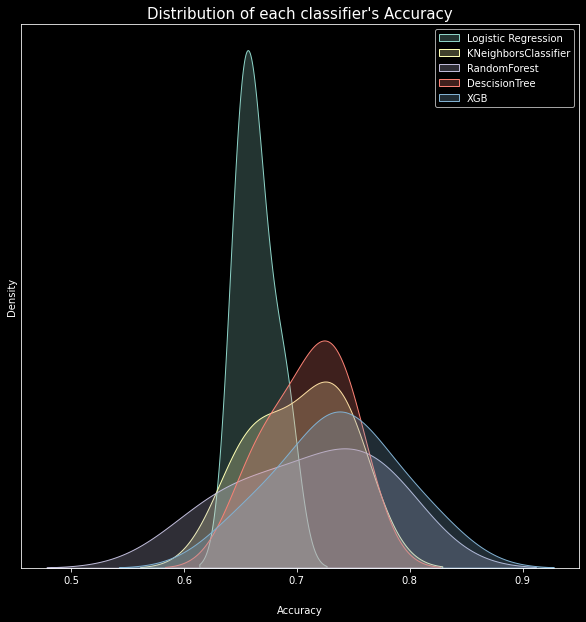

In [124]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= fixed_seed ) 
mean=[]
for model in models:
    result = cross_val_score(model, x, y, cv=skf, scoring="recall", n_jobs=-1)
    mean.append(result)
classifiers=['Logistic Regression', 'KNeighborsClassifier', 'RandomForest', 'DescisionTree', 'XGB']

plt.figure(figsize=(10, 10))
for x in range(len(mean)):
    sb.kdeplot(mean[x], shade=True)
    
plt.title("Distribution of each classifier's Accuracy", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Accuracy", labelpad=20)
plt.yticks([])

plt.show()

In [95]:
lgreg = LogisticRegression(random_state=fixed_seed)
lgreg.fit(x_train, y_train)
lgreg_pred = lgreg.predict(x_test)

print(lgreg.score(x_train, y_train))
print(lgreg.score(x_test, y_test))

scores = cross_val_score(lgreg, x_train, y_train, cv= 5 , scoring= 'f1_macro' ) 
print(scores) 
# Accuracy = accuracy_score(y_true=y_test, y_pred=lgreg_pred)
# print(Accuracy) 
cnf_mat = confusion_matrix(y_true=y_test, y_pred=lgreg_pred) 
print(cnf_mat)
print(classification_report(y_test, lgreg_pred))

0.6846733668341709
0.6582914572864321
[0.65623657 0.70440252 0.63346582 0.65386899 0.72917409]
[[64 35]
 [33 67]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        99
           1       0.66      0.67      0.66       100

    accuracy                           0.66       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.66      0.66      0.66       199



In [96]:
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Print the accuracy
print(knn.score(x_test, y_test))

knn_pred = knn.predict(x_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

knn_pred_probs = knn.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_test, knn_pred_probs))

0.6582914572864321
[[60 39]
 [29 71]]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        99
           1       0.65      0.71      0.68       100

    accuracy                           0.66       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.66      0.66      0.66       199

0.7274242424242423


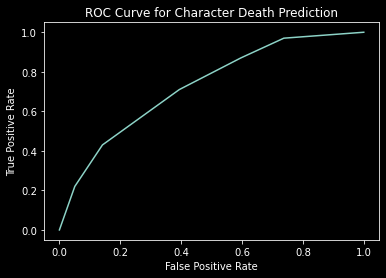

In [98]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Character Death Prediction')
plt.show()

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)
# print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

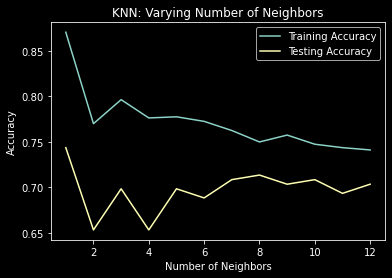

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display plot
plt.show()

Predicting probability of character dying

In [99]:
logreg = LogisticRegression(random_state=fixed_seed)

# Fit the model
logreg.fit(x_train, y_train)

# Prediction
logreg_pred = logreg.predict(x_test)

# Predict probabilities
log_pred_probs = logreg.predict_proba(x_test)[:, 1]

print(log_pred_probs[:10])

[0.59351979 0.7140709  0.82118846 0.37355258 0.70913485 0.32924708
 0.22868444 0.78268138 0.82382199 0.35617767]


ROC Curve

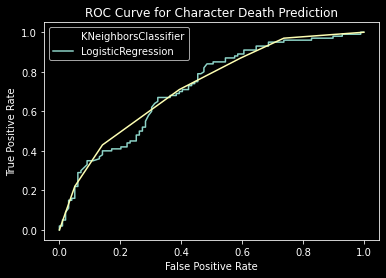

In [100]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, log_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Character Death Prediction')
plt.legend(['KNeighborsClassifier', 'LogisticRegression', ])
plt.show()

In [102]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, log_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, logreg_pred))

# Calculate the classification report
print(classification_report(y_test, logreg_pred))

0.7191919191919192
[[64 35]
 [33 67]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        99
           1       0.66      0.67      0.66       100

    accuracy                           0.66       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.66      0.66      0.66       199



In [103]:
rdfrst = RandomForestClassifier(random_state=5)

# Fit the classifier to the training data
rdfrst.fit(x_train, y_train)

# Print the accuracy
print(rdfrst.score(x_test, y_test))

rdfrst_pred = rdfrst.predict(x_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, rdfrst_pred))
print(classification_report(y_test, rdfrst_pred))

y_pred_probs = rdfrst.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_test, y_pred_probs))

0.6683417085427136
[[62 37]
 [29 71]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        99
           1       0.66      0.71      0.68       100

    accuracy                           0.67       199
   macro avg       0.67      0.67      0.67       199
weighted avg       0.67      0.67      0.67       199

0.7035858585858585


In [104]:
dectre = DecisionTreeClassifier(random_state=5)

# Fit the classifier to the training data
dectre.fit(x_train, y_train)

# Print the accuracy
print(dectre.score(x_test, y_test))

dectre_pred = dectre.predict(x_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, dectre_pred))
print(classification_report(y_test, dectre_pred))

y_pred_probs = dectre.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_test, y_pred_probs))

0.6582914572864321
[[61 38]
 [30 70]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        99
           1       0.65      0.70      0.67       100

    accuracy                           0.66       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.66      0.66      0.66       199

0.662020202020202


In [ ]:
cm1 = confusion_matrix(y_test, dectre_pred)
cm = cm1.astype('float') / cm1.sum(axis = 1)[:, np.newaxis]
cm

array([[0.76767677, 0.23232323],
       [0.32      , 0.68      ]])

[Text(0.5, 80.23200000000004, 'Predicted Class'),
 Text(124.29600000000002, 0.5, 'Actual Class')]

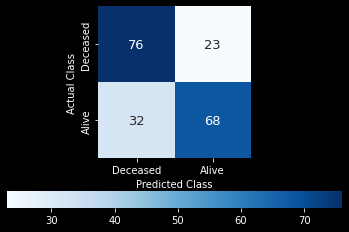

In [ ]:
sb.heatmap(cm1, square = True, xticklabels = ["Deceased", "Alive"], annot = True,
                    annot_kws = {"fontsize": 13}, yticklabels = ["Deceased", "Alive"],
                    cbar = True, cbar_kws = {"orientation": "horizontal"}, cmap = "Blues").set(
        xlabel = "Predicted Class", ylabel = "Actual Class",)

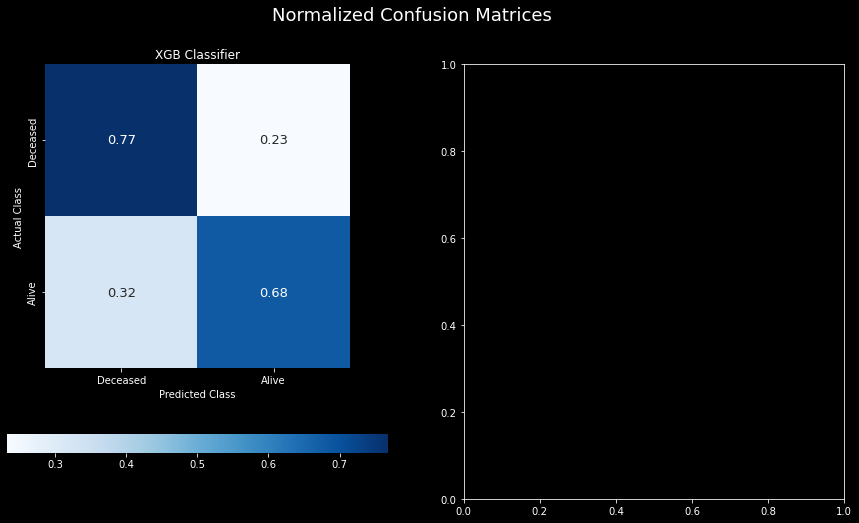

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 8))
f.suptitle("Normalized Confusion Matrices", fontsize = 18.)
def make_cm(p, t, axis):
    cm = confusion_matrix(y_test, dectre_pred)
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    _ = sb.heatmap(cm, square = True, xticklabels = ["Deceased", "Alive"], annot = True,
                    annot_kws = {"fontsize": 13}, yticklabels = ["Deceased", "Alive"],
                    cbar = True, cbar_kws = {"orientation": "horizontal"}, ax = ax[axis], cmap = "Blues").set(
        xlabel = "Predicted Class", ylabel = "Actual Class", title = t)
make_cm(y_pred_probs, "XGB Classifier", 0)
# make_cm(preds_lr, "Logistic Regression", 1)

In [ ]:
_ = plt.figure(figsize = (8, 8)), plt.plot(*roc_curve(y_test, knn_pred_probs)), plt.plot(*roc_curve(y_test, log_pred_probs)), c = sb.color_palette()[1]), plt.legend(["XGB Classifier", "Logistic Regression"], loc = "upper left")
_ = plt.plot((0., 1.), (0., 1.), "--k", alpha = .7), 
plt.xlabel("False Positive Rate"), 
plt.ylabel("True Positive Rate"), 
plt.title("ROC Curves", fontsize = 16.)

SyntaxError: cannot assign to function call (4147808215.py, line 1)

In [ ]:
X = und_samp_df.drop("isAlive", axis=1).values
y = und_samp_df["isAlive"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters, scoring='accuracy')

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.6588628762541806
[[108  47]
 [ 55  89]]
0.6723535457348406 
 {'logreg__C': 0.05357894736842105}


In [ ]:
X = und_samp_df.drop("isAlive", axis=1).values
y = und_samp_df["isAlive"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]

# Create the parameter space
parameters = {"knn__n_neighbors": np.arange(10)}

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.6889632107023411
[[108  47]
 [ 46  98]]
0.7054881808838643 
 {'knn__n_neighbors': 8}


c:\Users\okoro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\okoro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\okoro\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\okoro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\Users\okoro\anac

In [ ]:
X = und_samp_df.drop("isAlive", axis=1).values
y = und_samp_df["isAlive"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("rdfrst", RandomForestClassifier())]

# Create the parameter space
# parameters = {"knn__n_neighbors": np.arange(10)}

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Instantiate the grid search object
# cv = GridSearchCV(pipeline, param_grid=parameters)

# # Fit to the training data
# cv.fit(X_train, y_train)
# print(cv.best_score_, "\n", cv.best_params_)

0.6889632107023411
[[104  51]
 [ 42 102]]


In [ ]:
data1 = de.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

rdf = RandomForestClassifier(random_state=42)
rdf.fit(train1[features], train1['isAlive'])
predrdf = rdf.predict(test1[features])
rdf.score(train1[features], train1['isAlive'])

0.8935389133627019

In [ ]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

rdf = RandomForestClassifier(random_state=42)
rdf.fit(train1[features], train1['isAlive'])
predrdf = rdf.predict(test1[features])
rdf.score(train1[features], train1['isAlive'])

0.9016152716593245

In [ ]:
rdf.score(test1[features], test1['isAlive'])

0.702054794520548

In [ ]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train1[features], train1['isAlive'])
pred_dt = dt.predict(test1[features])
dt.score(train1[features], train1['isAlive'])

0.9016152716593245

In [ ]:
dt.score(test1[features], test1['isAlive'])

0.6815068493150684

In [ ]:
# Separate our labels from our features
x = new[new.columns.drop('isAlive')].values

y = new['isAlive'].values
y


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
seed = 42
np.random.seed(seed)

In [ ]:
# Split data into 5 equal groups for validation
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [ ]:
# Let's build different models to train with our data
models = [LogisticRegression(max_iter=500, solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=seed), 
          DecisionTreeClassifier(random_state=seed), KNeighborsClassifier(n_neighbors=5)]

In [ ]:
# Validate each model using K-fold cross validation
mean=[]
std=[]
for model in models:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)

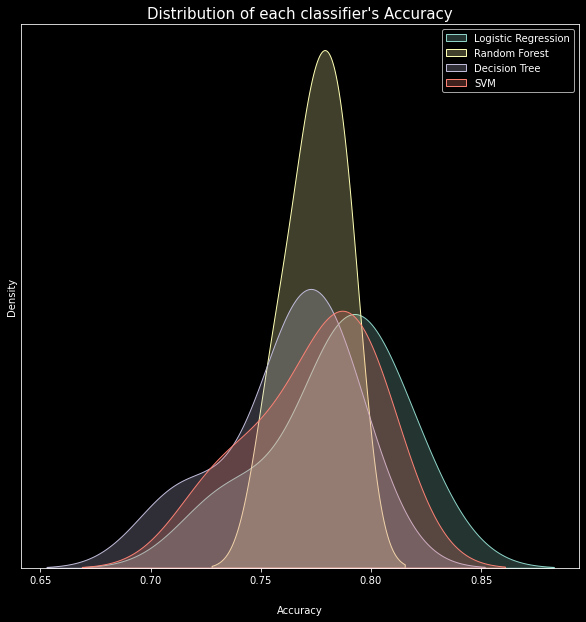

In [ ]:
classifiers=['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']

plt.figure(figsize=(10, 10))
for x in range(len(mean)):
    sb.kdeplot(mean[x], shade=True)
    
plt.title("Distribution of each classifier's Accuracy", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Accuracy", labelpad=20)
plt.yticks([])

plt.show()